In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df =pd.read_csv("Electric_Production.csv")

In [4]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
df = df.reset_index()['Value']

In [6]:
df

0       72.5052
1       70.6720
2       62.4502
3       57.4714
4       55.3151
5       58.0904
6       62.6202
7       63.2485
8       60.5846
9       56.3154
10      58.0005
11      68.7145
12      73.3057
13      67.9869
14      62.2221
15      57.0329
16      55.8137
17      59.9005
18      65.7655
19      64.4816
20      61.0005
21      57.5322
22      59.3417
23      68.1354
24      73.8152
25      70.0620
26      65.6100
27      60.1586
28      58.8734
29      63.8918
         ...   
367    110.5925
368    101.9204
369     91.5959
370     93.0628
371    103.2203
372    117.0837
373    106.6688
374     95.3548
375     89.3254
376     90.7369
377    104.0375
378    114.5397
379    115.5159
380    102.7637
381     91.4867
382     92.8900
383    112.7694
384    114.8505
385     99.4901
386    101.0396
387     88.3530
388     92.0805
389    102.1532
390    112.1538
391    108.9312
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: Value, Length: 397

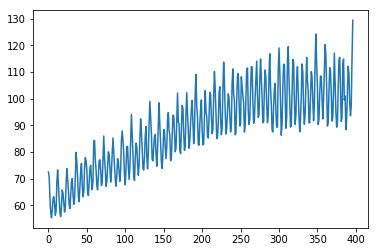

In [8]:
import matplotlib.pyplot as plt
plt.plot(df)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [10]:
df

array([[0.23201741],
       [0.20727443],
       [0.09630353],
       [0.02910391],
       [0.        ],
       [0.03745865],
       [0.09859805],
       [0.10707831],
       [0.07112325],
       [0.0135012 ],
       [0.03624525],
       [0.18085375],
       [0.24282188],
       [0.17103322],
       [0.09322483],
       [0.02318541],
       [0.00672968],
       [0.06188984],
       [0.14105065],
       [0.12372165],
       [0.07673671],
       [0.02992454],
       [0.05434764],
       [0.17303755],
       [0.24969868],
       [0.19904116],
       [0.13895184],
       [0.06537346],
       [0.04802692],
       [0.11576103],
       [0.18294446],
       [0.1991073 ],
       [0.11877494],
       [0.06834688],
       [0.09649384],
       [0.20600164],
       [0.33142529],
       [0.28137649],
       [0.20215631],
       [0.10694199],
       [0.08221656],
       [0.15919352],
       [0.23844745],
       [0.27602217],
       [0.16466661],
       [0.10754666],
       [0.13217357],
       [0.250

In [11]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [12]:
training_size,test_size

(258, 139)

In [13]:
train_data

array([[0.23201741],
       [0.20727443],
       [0.09630353],
       [0.02910391],
       [0.        ],
       [0.03745865],
       [0.09859805],
       [0.10707831],
       [0.07112325],
       [0.0135012 ],
       [0.03624525],
       [0.18085375],
       [0.24282188],
       [0.17103322],
       [0.09322483],
       [0.02318541],
       [0.00672968],
       [0.06188984],
       [0.14105065],
       [0.12372165],
       [0.07673671],
       [0.02992454],
       [0.05434764],
       [0.17303755],
       [0.24969868],
       [0.19904116],
       [0.13895184],
       [0.06537346],
       [0.04802692],
       [0.11576103],
       [0.18294446],
       [0.1991073 ],
       [0.11877494],
       [0.06834688],
       [0.09649384],
       [0.20600164],
       [0.33142529],
       [0.28137649],
       [0.20215631],
       [0.10694199],
       [0.08221656],
       [0.15919352],
       [0.23844745],
       [0.27602217],
       [0.16466661],
       [0.10754666],
       [0.13217357],
       [0.250

In [17]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(157, 100)
(157,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(38, 100)
(38,)


(None, None)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\Chaitu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 157 samples, validate on 38 samples
Epoch 1/100
157/157 [==============================] - 6s 36ms/step - loss: 0.1947 - val_loss: 0.1903
Epoch 2/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0689 - val_loss: 0.0163
Epoch 3/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0317 - val_loss: 0.0465
Epoch 4/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0233 - val_loss: 0.0221
Epoch 5/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0151 - val_loss: 0.0474
Epoch 6/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0226 - val_loss: 0.0437
Epoch 7/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0176 - val_loss: 0.0239
Epoch 8/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0113 - val_loss: 0.0162
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0138 - val_loss: 0.0172
Epoch 10/100
157/157 [=======================

Epoch 81/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0105 - val_loss: 0.0162
Epoch 82/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0103 - val_loss: 0.0172
Epoch 83/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0103 - val_loss: 0.0164
Epoch 84/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0102 - val_loss: 0.0161
Epoch 85/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0103 - val_loss: 0.0166
Epoch 86/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0103 - val_loss: 0.0167
Epoch 87/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0102 - val_loss: 0.0165
Epoch 88/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0102 - val_loss: 0.0161
Epoch 89/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0103 - val_loss: 0.0162
Epoch 90/100
157/157 [==============================] - 1s 7ms/step - loss: 0.0102

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [27]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

88.45144927218824

In [29]:
math.sqrt(mean_squared_error(ytest,test_predict))


102.2500599683507

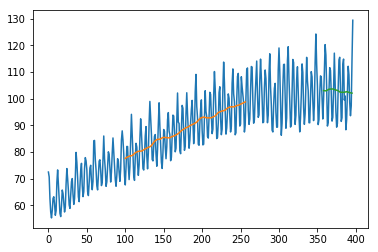

In [33]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)


139

In [35]:
x_input=test_data[39:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.45866834391285183,
 0.45948897080160944,
 0.7473279011792462,
 0.8597888775362839,
 0.7452844322490171,
 0.5797310557337931,
 0.4182079290373697,
 0.4794364128887012,
 0.6618828258178939,
 0.7759715587996714,
 0.7772510888828001,
 0.6047507278339637,
 0.4536393047886549,
 0.5056019932595222,
 0.7964872310186166,
 0.866151435354712,
 0.7026644729294356,
 0.5910092765931028,
 0.45948627137105436,
 0.4690894955709093,
 0.6411862917517552,
 0.8016188485039082,
 0.7866235117701921,
 0.5959816276756418,
 0.4729604789869577,
 0.5195647978059028,
 0.7020692484920306,
 0.7646069561625977,
 0.6485759828964082,
 0.5164294092161259,
 0.4351684512152163,
 0.5054035851137204,
 0.6185056762275998,
 0.7790637565005665,
 0.7362021981463012,
 0.5591600451884675,
 0.4732830609382952,
 0.526747982513089,
 0.6742786109270249,
 0.8123382872383071,
 0.6940087488544291,
 0.6435401951958235,
 0.4817687208883288,
 0.4811505512912051,
 0.612508891249391,
 0.7400880284304026,
 0.713466244295766,
 0.59341311950

In [38]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.63144124]
101
1 day input [0.45948897 0.7473279  0.85978888 0.74528443 0.57973106 0.41820793
 0.47943641 0.66188283 0.77597156 0.77725109 0.60475073 0.4536393
 0.50560199 0.79648723 0.86615144 0.70266447 0.59100928 0.45948627
 0.4690895  0.64118629 0.80161885 0.78662351 0.59598163 0.47296048
 0.5195648  0.70206925 0.76460696 0.64857598 0.51642941 0.43516845
 0.50540359 0.61850568 0.77906376 0.7362022  0.55916005 0.47328306
 0.52674798 0.67427861 0.81233829 0.69400875 0.6435402  0.48176872
 0.48115055 0.61250889 0.74008803 0.71346624 0.59341312 0.49226816
 0.5664782  0.78496876 0.93049101 0.7769771  0.66740721 0.47201703
 0.49695032 0.62846657 0.71851553 0.71371459 0.60874993 0.50032056
 0.59911432 0.72928626 0.87670081 0.82418609 0.66345929 0.46472047
 0.48289978 0.63887963 0.76016369 0.74608751 0.62903885 0.4896875
 0.50948647 0.6465838  0.83370023 0.69312873 0.54042195 0.45904222
 0.47809345 0.65761368 0.79936347 0.81253939 0.640421   0.48821361
 0.50715417 0.77546946 0.80355839 0

10 day output [[0.65561724]]
11 day input [0.60475073 0.4536393  0.50560199 0.79648723 0.86615144 0.70266447
 0.59100928 0.45948627 0.4690895  0.64118629 0.80161885 0.78662351
 0.59598163 0.47296048 0.5195648  0.70206925 0.76460696 0.64857598
 0.51642941 0.43516845 0.50540359 0.61850568 0.77906376 0.7362022
 0.55916005 0.47328306 0.52674798 0.67427861 0.81233829 0.69400875
 0.6435402  0.48176872 0.48115055 0.61250889 0.74008803 0.71346624
 0.59341312 0.49226816 0.5664782  0.78496876 0.93049101 0.7769771
 0.66740721 0.47201703 0.49695032 0.62846657 0.71851553 0.71371459
 0.60874993 0.50032056 0.59911432 0.72928626 0.87670081 0.82418609
 0.66345929 0.46472047 0.48289978 0.63887963 0.76016369 0.74608751
 0.62903885 0.4896875  0.50948647 0.6465838  0.83370023 0.69312873
 0.54042195 0.45904222 0.47809345 0.65761368 0.79936347 0.81253939
 0.640421   0.48821361 0.50715417 0.77546946 0.80355839 0.59623672
 0.61715056 0.44591758 0.49622822 0.63218099 0.76716062 0.72366469
 0.58443076 0.51692206

20 day output [[0.65582895]]
21 day input [0.80161885 0.78662351 0.59598163 0.47296048 0.5195648  0.70206925
 0.76460696 0.64857598 0.51642941 0.43516845 0.50540359 0.61850568
 0.77906376 0.7362022  0.55916005 0.47328306 0.52674798 0.67427861
 0.81233829 0.69400875 0.6435402  0.48176872 0.48115055 0.61250889
 0.74008803 0.71346624 0.59341312 0.49226816 0.5664782  0.78496876
 0.93049101 0.7769771  0.66740721 0.47201703 0.49695032 0.62846657
 0.71851553 0.71371459 0.60874993 0.50032056 0.59911432 0.72928626
 0.87670081 0.82418609 0.66345929 0.46472047 0.48289978 0.63887963
 0.76016369 0.74608751 0.62903885 0.4896875  0.50948647 0.6465838
 0.83370023 0.69312873 0.54042195 0.45904222 0.47809345 0.65761368
 0.79936347 0.81253939 0.640421   0.48821361 0.50715417 0.77546946
 0.80355839 0.59623672 0.61715056 0.44591758 0.49622822 0.63218099
 0.76716062 0.72366469 0.58443076 0.51692206 0.56716116 0.80181321
 1.         0.63144124 0.63384145 0.63717616 0.64085495 0.64442241
 0.64759207 0.6502245

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt


In [41]:
len(df)

397

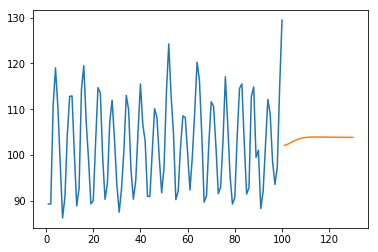

In [43]:
plt.plot(day_new,scaler.inverse_transform(df[297:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [44]:
df3=df.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()


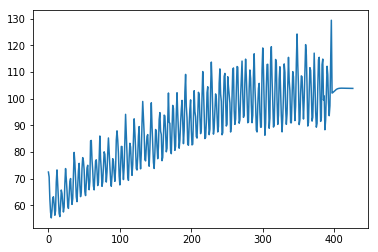

In [45]:
plt.plot(df3)